<h2> <center>PUNE INSTITUE OF COMPUTER TECHNOLOGY</center><h2>
<h3><center>MINI PROJECT</center><h3>
<h2><center>TWITTER SENTIMENT ANALYSIS
<center></h2>
<h2><center>DARSHAN JAIN 43116</center></h2></p>

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/darshanjain22/twittersentimentanalysis/main/testdata.manual.2009.06.14.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎 📊</strong></center></h2>
        
</div>

#### Five top records of data

In [ ]:
data.head()

,label,time,date,query,username,text
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...


#### Five last records of data

In [ ]:
data.tail()

,label,time,date,query,username,text
492,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
493,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
494,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
495,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
496,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


#### Coloumns/features in data

In [ ]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [ ]:
print('lenght of data is', len(data))

lenght of data is 497


#### Shape of data

In [ ]:
data.shape

(497, 6)

#### Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     497 non-null    int64 
 1   time      497 non-null    int64 
 2   date      497 non-null    object
 3   query     497 non-null    object
 4   username  497 non-null    object
 5   text      497 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.4+ KB


#### Data types of all coloumns

In [ ]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [ ]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [ ]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   497


<h1><center><strong>Data Preparation 📝</strong></center></h1>

In [ ]:
data=data[['text','label']]

In [ ]:
data['label'][data['label']==4]=1

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
data = pd.concat([data_pos, data_neg])

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()

484    monday already. iran may implode. kitchen is a...
489    i just created my first latex file from scratc...
493    on that note, i hate word. i hate pages. i hat...
495    trouble in iran, i see. hmm. iran. iran so far...
496    reading the tweets coming out of iran... the w...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    reading kindle2... love it... lee childs good ...
1    ok, first assesment #kindle2 ...it fucking roc...
2    @kenburbary love kindle2. i've mine months nev...
3      @mikefish fair enough. kindle2 think perfect :)
4     @richardebaker no. big. i'm quite happy kindle2.
Name: text, dtype: object

#### Cleaning and removing punctuations 

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

484    monday already iran may implode kitchen disast...
489    created first latex file scratch work well see...
493    note hate word hate pages hate latex there sai...
495    trouble iran see hmm iran iran far away flocko...
496    reading tweets coming iran whole thing terrify...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

484    monday already iran may implode kitchen disast...
489    created first latex file scratch work wel se a...
493    note hate word hate pages hate latex there sai...
495    trouble iran se hm iran iran far away flockofs...
496    reading twets coming iran whole thing terifyin...
Name: text, dtype: object

#### Cleaning and removing email

In [ ]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

484    monday already iran may implode kitchen disast...
489    created first latex file scratch work wel se a...
493    note hate word hate pages hate latex there sai...
495    trouble iran se hm iran iran far away flockofs...
496    reading twets coming iran whole thing terifyin...
Name: text, dtype: object

#### Cleaning and removing URL's

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

484    monday already iran may implode kitchen disast...
489    created first latex file scratch work wel se a...
493    note hate word hate pages hate latex there sai...
495    trouble iran se hm iran iran far away flockofs...
496    reading twets coming iran whole thing terifyin...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

484    monday already iran may implode kitchen disast...
489    created first latex file scratch work wel se a...
493    note hate word hate pages hate latex there sai...
495    trouble iran se hm iran iran far away flockofs...
496    reading twets coming iran whole thing terifyin...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
data['text'].head()

0    [reading, kindle, love, it, le, childs, god, r...
1    [ok, first, asesment, kindle, it, fucking, rocks]
2    [kenburbary, love, kindle, ive, mine, months, ...
3     [mikefish, fair, enough, kindle, think, perfect]
4    [richardebaker, no, big, im, quite, hapy, kindle]
Name: text, dtype: object

#### Applying Stemming

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

0    [reading, kindle, love, it, le, childs, god, r...
1    [ok, first, asesment, kindle, it, fucking, rocks]
2    [kenburbary, love, kindle, ive, mine, months, ...
3     [mikefish, fair, enough, kindle, think, perfect]
4    [richardebaker, no, big, im, quite, hapy, kindle]
Name: text, dtype: object

#### Applying Lemmatizer

In [ ]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['text'].head()

0    [reading, kindle, love, it, le, childs, god, r...
1    [ok, first, asesment, kindle, it, fucking, rocks]
2    [kenburbary, love, kindle, ive, mine, months, ...
3     [mikefish, fair, enough, kindle, think, perfect]
4    [richardebaker, no, big, im, quite, hapy, kindle]
Name: text, dtype: object

####  Separating input feature and label

In [ ]:
X=data.text
y=data.label

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix.shape

(358, 500)

#### Separating the 70% data for training data and 30% for testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow based model for training 🧪</strong></center></h2>   
</div>

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
3/3 [==============================] - 5s 742ms/step - loss: 0.6936 - accuracy: 0.4711 - val_loss: 0.6955 - val_accuracy: 0.4000
Epoch 2/6
3/3 [==============================] - 1s 458ms/step - loss: 0.6874 - accuracy: 0.5378 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 3/6
3/3 [==============================] - 1s 446ms/step - loss: 0.6674 - accuracy: 0.7644 - val_loss: 0.6834 - val_accuracy: 0.4800
Epoch 4/6
3/3 [==============================] - 1s 447ms/step - loss: 0.6290 - accuracy: 0.7956 - val_loss: 0.6504 - val_accuracy: 0.8400
Epoch 5/6
3/3 [==============================] - 1s 435ms/step - loss: 0.5338 - accuracy: 0.9778 - val_loss: 0.7599 - val_accuracy: 0.4400
Epoch 6/6
3/3 [==============================] - 1s 443ms/step - loss: 0.4559 - accuracy: 0.8222 - val_loss: 0.5734 - val_accuracy: 0.8000
Training finished !!


In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

4/4 [==============================] - 0s 61ms/step - loss: 0.5480 - accuracy: 0.8241


In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.82


In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 



confusion matrix


[[46  5]
 [14 43]]




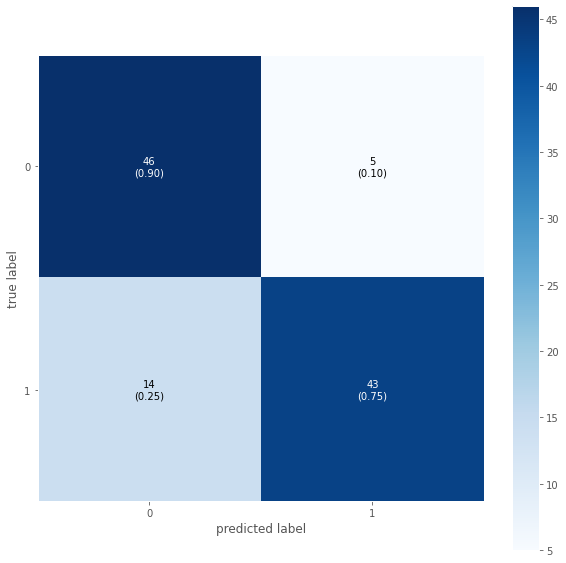

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

 
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated the model with different evaluation measures.</li>
        </p>